# Visualization

Trong bài tập này, bạn sẽ được rèn luyện kĩ năng trực quan hóa. Trực quan hóa ngoài việc hỗ  trợ trong khâu tiền xử lí dữ liệu, còn giúp bạn phân tích và rút ra được các thông tin có ý nghĩa từ dữ liệu

**Tập dữ liệu** được sử dụng được lấy từ trang batdongsan.com.vn

In [4]:
#Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [5]:
# cd /content/drive/MyDrive/Preprocessing_practice/2.Assignment/Batdongsan.com.vn

In [6]:
#Load dữ liệu từ file
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string" , "id" : "string"})
print("DONE")

DONE


In [7]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [8]:
# Xem 5 hàng dữ liệu đầu tiên, các thông tin ban đầu: df.info(), df.describe(), ...
# Code ở đây:
newdf.head()

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


In [29]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81163 entries, 0 to 81162
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81163 non-null  string 
 1   month      81162 non-null  string 
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), object(6), string(2)
memory usage: 7.4+ MB


In [30]:
newdf.describe()

,square,bedrooms,bathrooms,price
count,81162.000000,81162.000000,81162.000000,81162.000000
mean,83.481974,2.365602,1.897785,2404.748090
std,25.662160,0.622283,0.404293,1038.825418
min,7.000000,1.000000,1.000000,350.000000
25%,66.000000,2.000000,2.000000,1520.000000
50%,79.000000,2.000000,2.000000,2300.000000
75%,98.000000,3.000000,2.000000,3150.000000
max,296.000000,4.000000,4.000000,5000.000000


Đưa ra các câu lệnh để thực hiện các yêu cầu sau:

1. Minh họa boxplot của các trường số như price, bedrooms, square, ...

* Gợi ý: sns.boxplot(data_field)

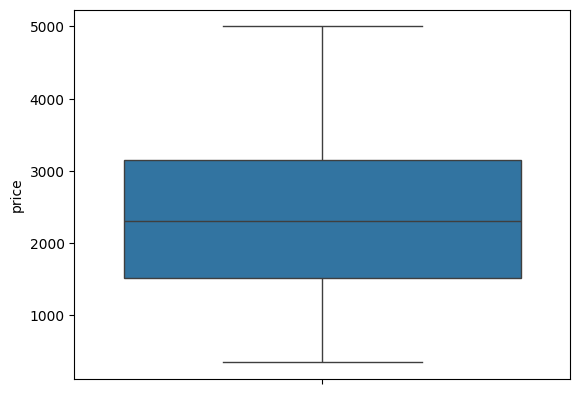

In [31]:
#Code for 'price' field
sns.boxplot(newdf['price'])
plt.show()

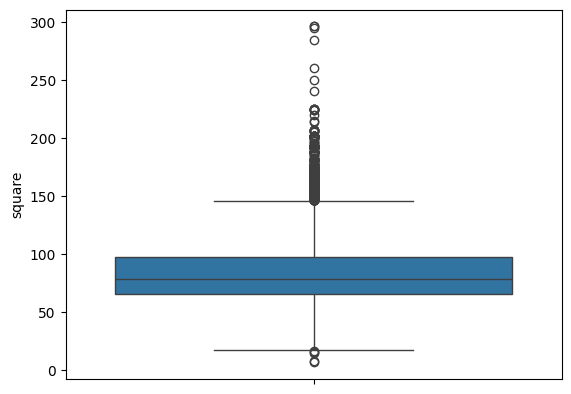

In [32]:
#Code for 'square' field
sns.boxplot(newdf['square'])
plt.show()

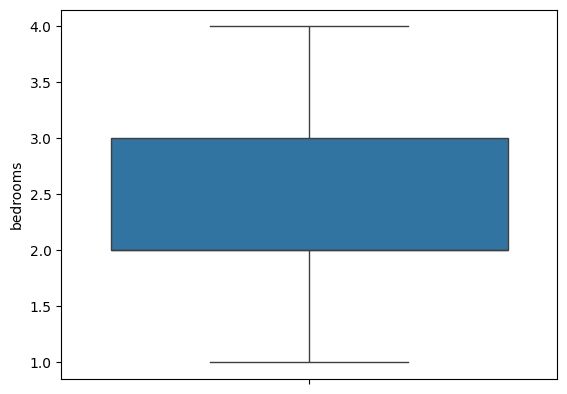

In [33]:
#Code for 'bedrooms' field
sns.boxplot(newdf['bedrooms'])
plt.show()

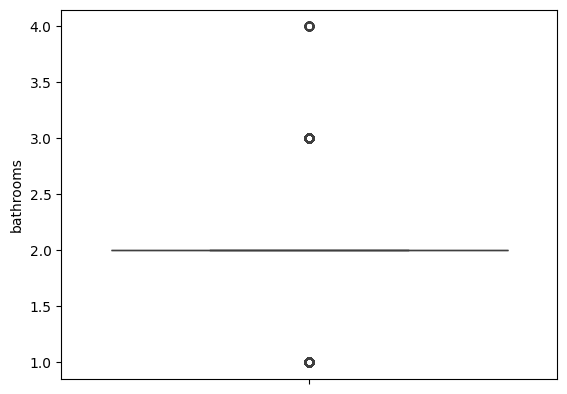

In [35]:
#Code for 'bathrooms' field
sns.boxplot(newdf['bathrooms'])
plt.show()

2. Cho đoạn code minh họa Biểu đồ thể hiện số bài đăng theo tháng của năm 2020. Hãy thực hiện các yêu cầu cho các câu hỏi dưới đây:

/var/folders/bn/wpq8w0rs35g1r9gt5h2tpkcr0000gn/T/ipykernel_19170/1920162332.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')


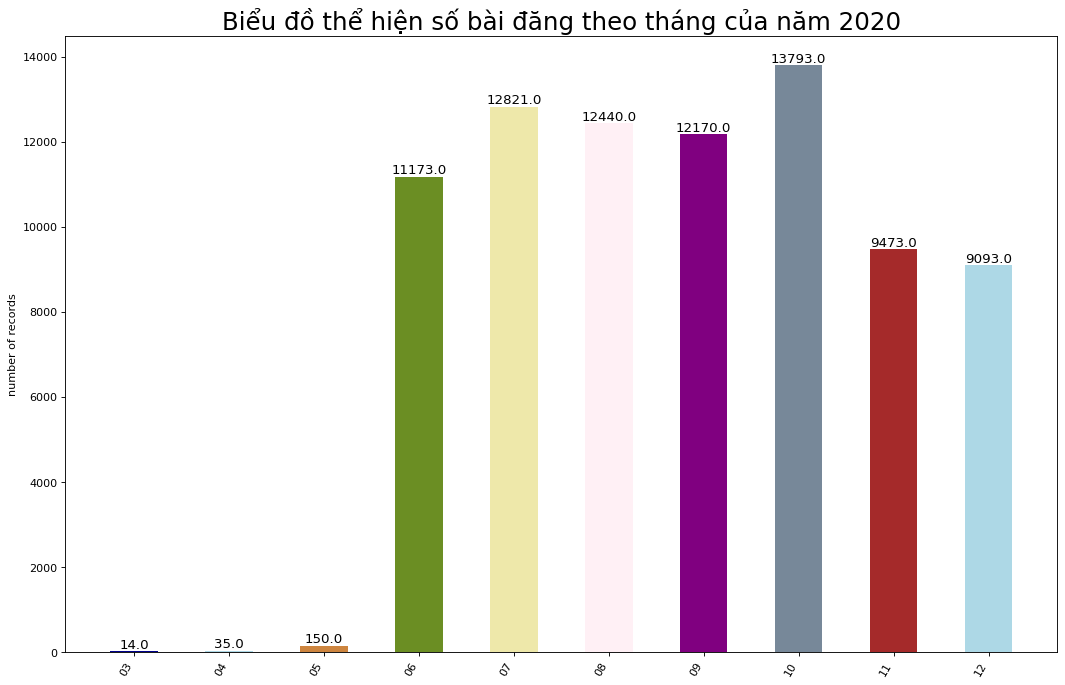

In [37]:
df1 = newdf.groupby('month').size().reset_index(name='number of records')
n = df1['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df1['month'], df1['number of records'], color=c, width=.5)
for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

* Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)

/var/folders/bn/wpq8w0rs35g1r9gt5h2tpkcr0000gn/T/ipykernel_19170/1100049996.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')


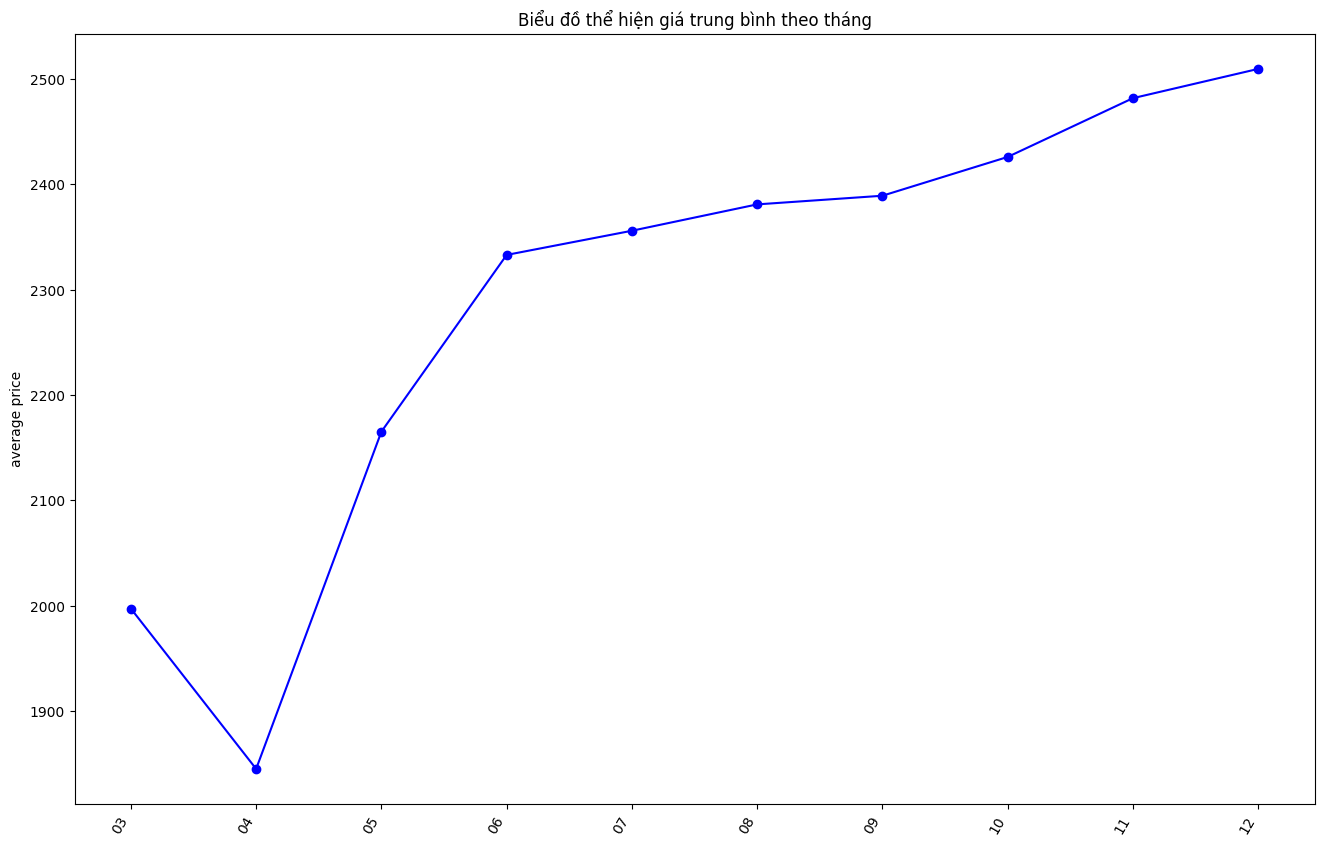

In [47]:
#Code ở đây
df1 = newdf.groupby('month')['price'].mean().reset_index(name='average price')
plt.figure(figsize=(16,10))
plt.plot(df1['month'], df1['average price'], color='blue', marker='o')
plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá trung bình theo tháng")
plt.ylabel('average price')
plt.show()


* Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)

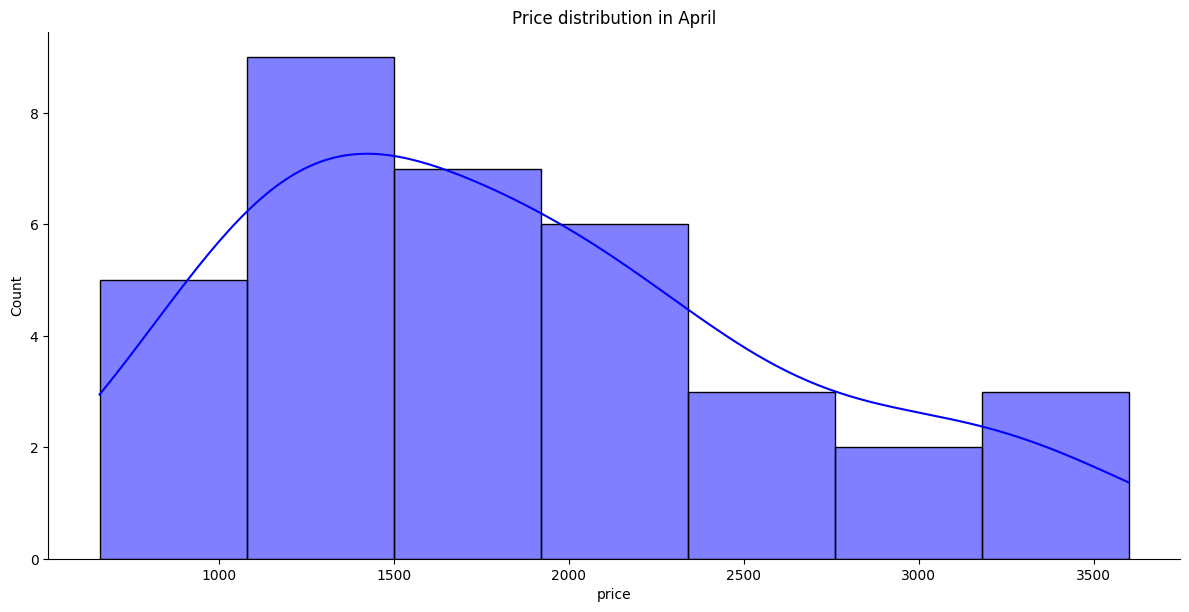

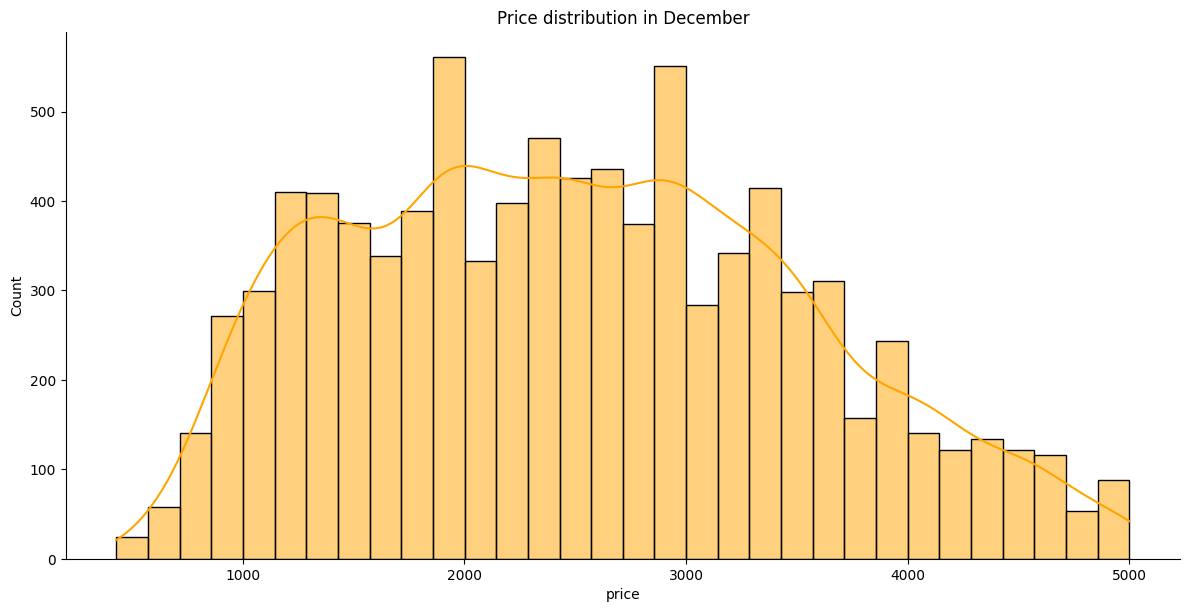

In [51]:
#Gọi ý: sns.displot()
df1 = newdf[newdf['month'] == '04']['price']
df2 = newdf[newdf['month'] == '12']['price']

sns.displot(df1, kde=True, color='blue', label='April', height=6, aspect=2)
plt.title('Price distribution in April')

sns.displot(df2, kde=True, color='orange', label='December', height=6, aspect=2)
plt.title('Price distribution in December')
plt.show()

* Số lượng bất động sản phân theo số lượng bedrooms

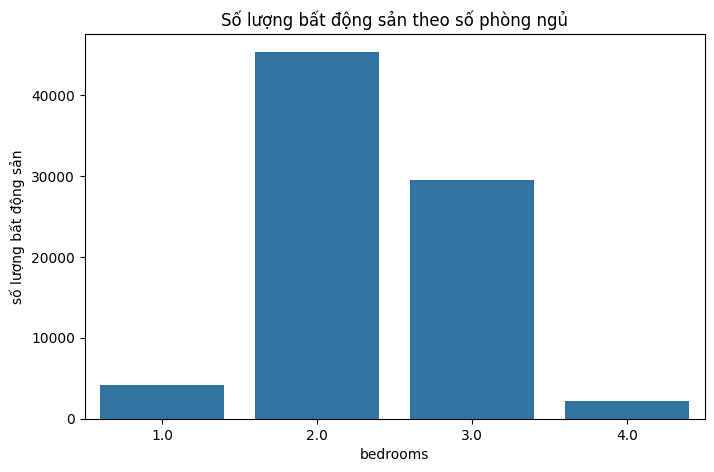

In [66]:
#Code ở đây
df1 = newdf.groupby('bedrooms').size().reset_index(name='số lượng bất động sản')
plt.figure(figsize=(8,5))
sns.barplot(data=df1, x='bedrooms', y='số lượng bất động sản')
plt.title('Số lượng bất động sản theo số phòng ngủ')
plt.ylabel('số lượng bất động sản')
plt.show()

* Giá bất động sản trung bình theo số lượng bedrooms

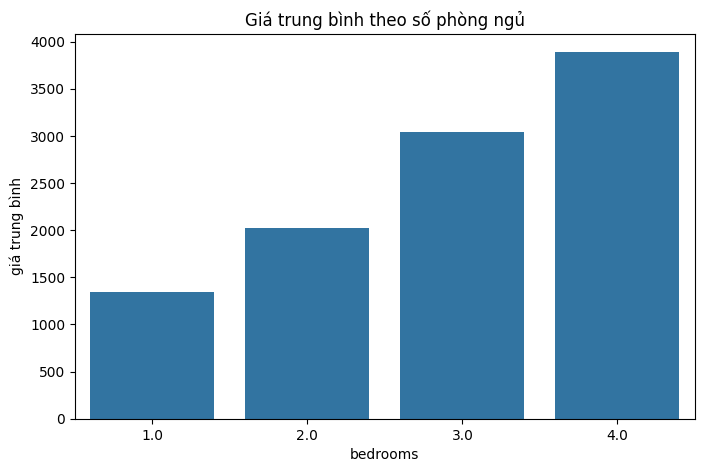

In [67]:
# Code ở đây
df1 = newdf.groupby('bedrooms')['price'].mean().reset_index(name='giá trung bình')
plt.figure(figsize=(8,5))
sns.barplot(data=df1, x='bedrooms', y='giá trung bình')
plt.title('Giá trung bình theo số phòng ngủ')
plt.ylabel('giá trung bình')
plt.show()

* Giá nhà đất trung bình theo quận (VND/m2)

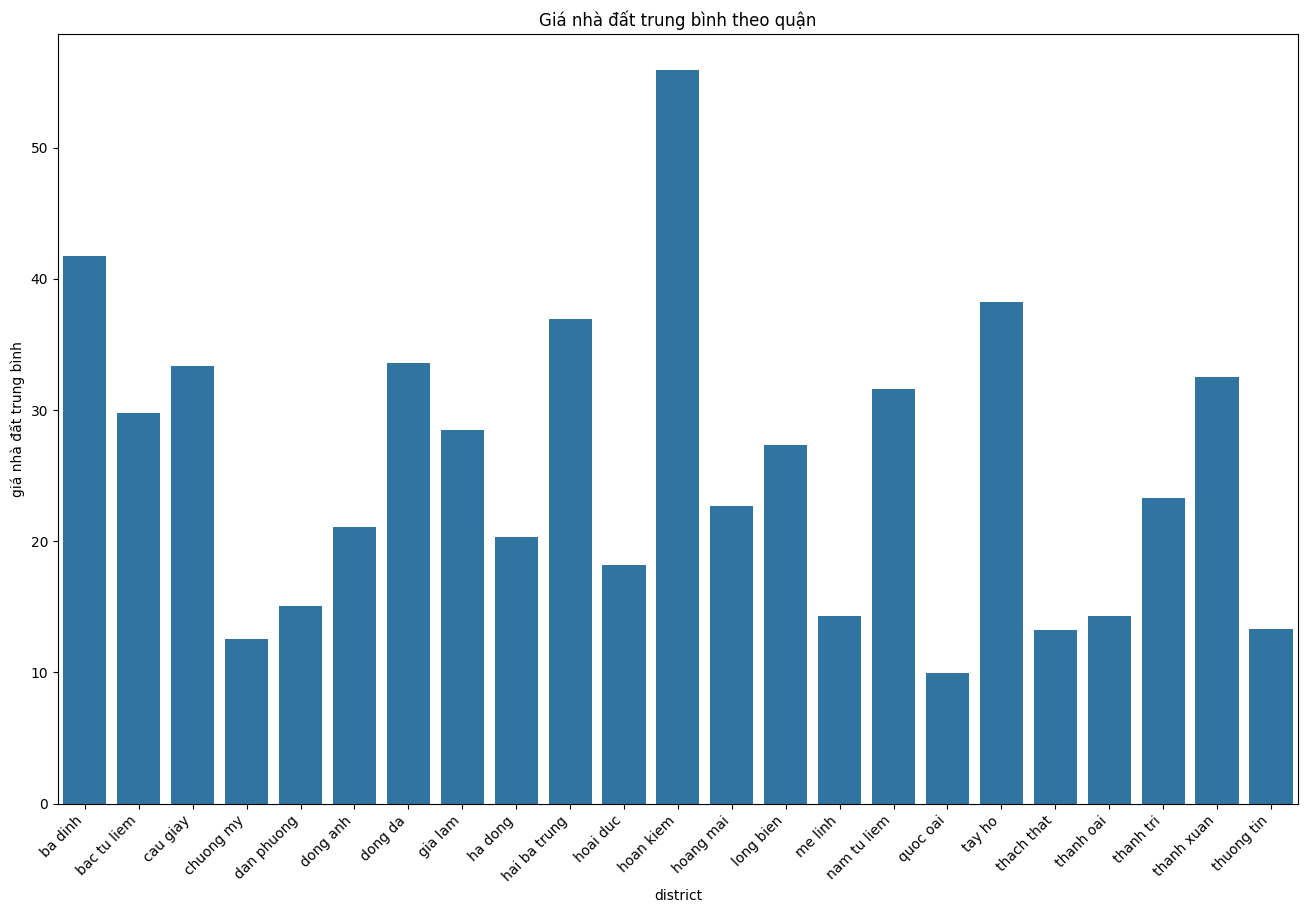

In [63]:
# Code ở đây
newdf['real_estate_prices'] = newdf['price']/newdf['square']
df1 = newdf.groupby('district')['real_estate_prices'].mean().reset_index(name='giá nhà đất trung bình')
plt.figure(figsize=(16,10))
sns.barplot(data=df1, x='district', y='giá nhà đất trung bình')
plt.title('Giá nhà đất trung bình theo quận')
plt.ylabel('giá nhà đất trung bình')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

* Giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)

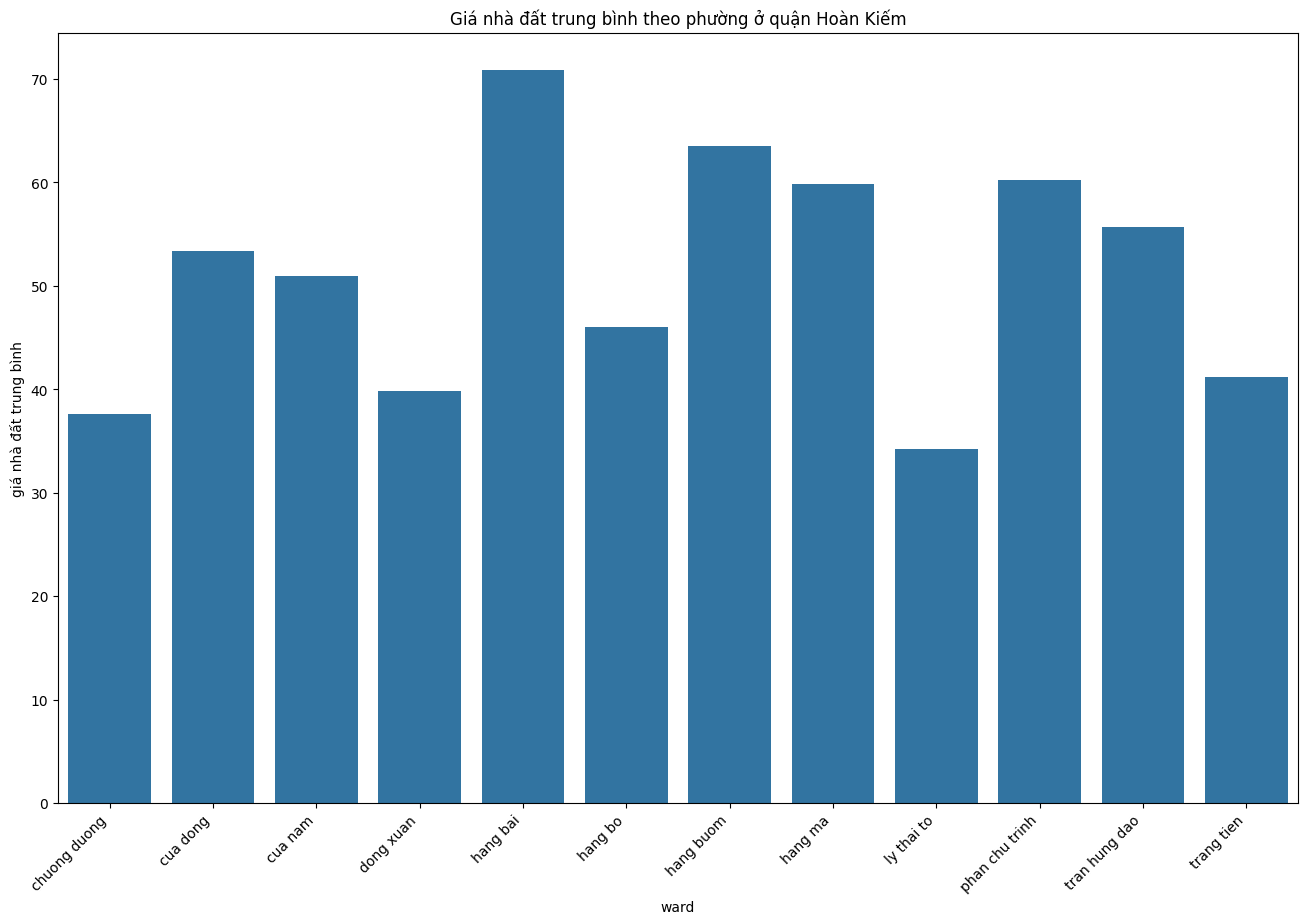

In [64]:
# Code ở đây
df1 = newdf[newdf['district']=='hoan kiem'].groupby('ward')['real_estate_prices'].mean().reset_index(name='giá nhà đất trung bình')
plt.figure(figsize=(16,10))
sns.barplot(data=df1, x='ward', y='giá nhà đất trung bình')
plt.title('Giá nhà đất trung bình theo phường ở quận Hoàn Kiếm')
plt.ylabel('giá nhà đất trung bình')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

* Giá nhà đất trung bình theo nhà đầu tư (VND/m2)

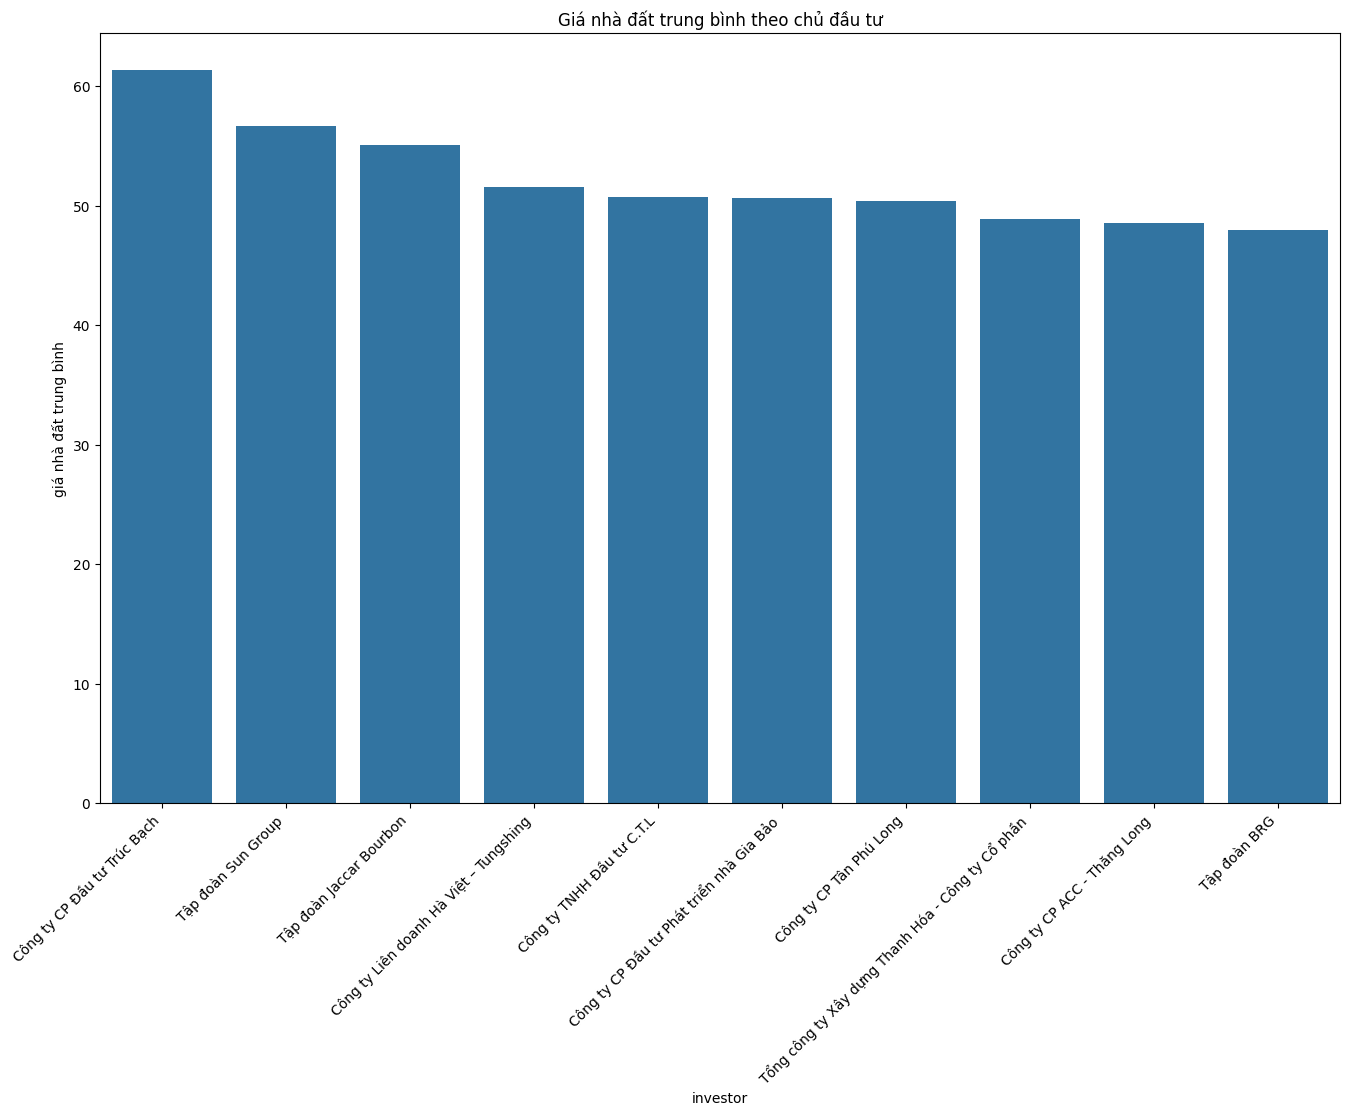

In [70]:
# Code ở đây
df1 = newdf.groupby('investor')['real_estate_prices'].mean().reset_index(name='giá nhà đất trung bình').sort_values(by='giá nhà đất trung bình', ascending=False).head(10)
plt.figure(figsize=(16,10))
sns.barplot(data=df1, x='investor', y='giá nhà đất trung bình')
plt.title('Giá nhà đất trung bình theo chủ đầu tư')
plt.ylabel('giá nhà đất trung bình')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

* Giá nhà đất trung bình theo dự án (VND/m2)

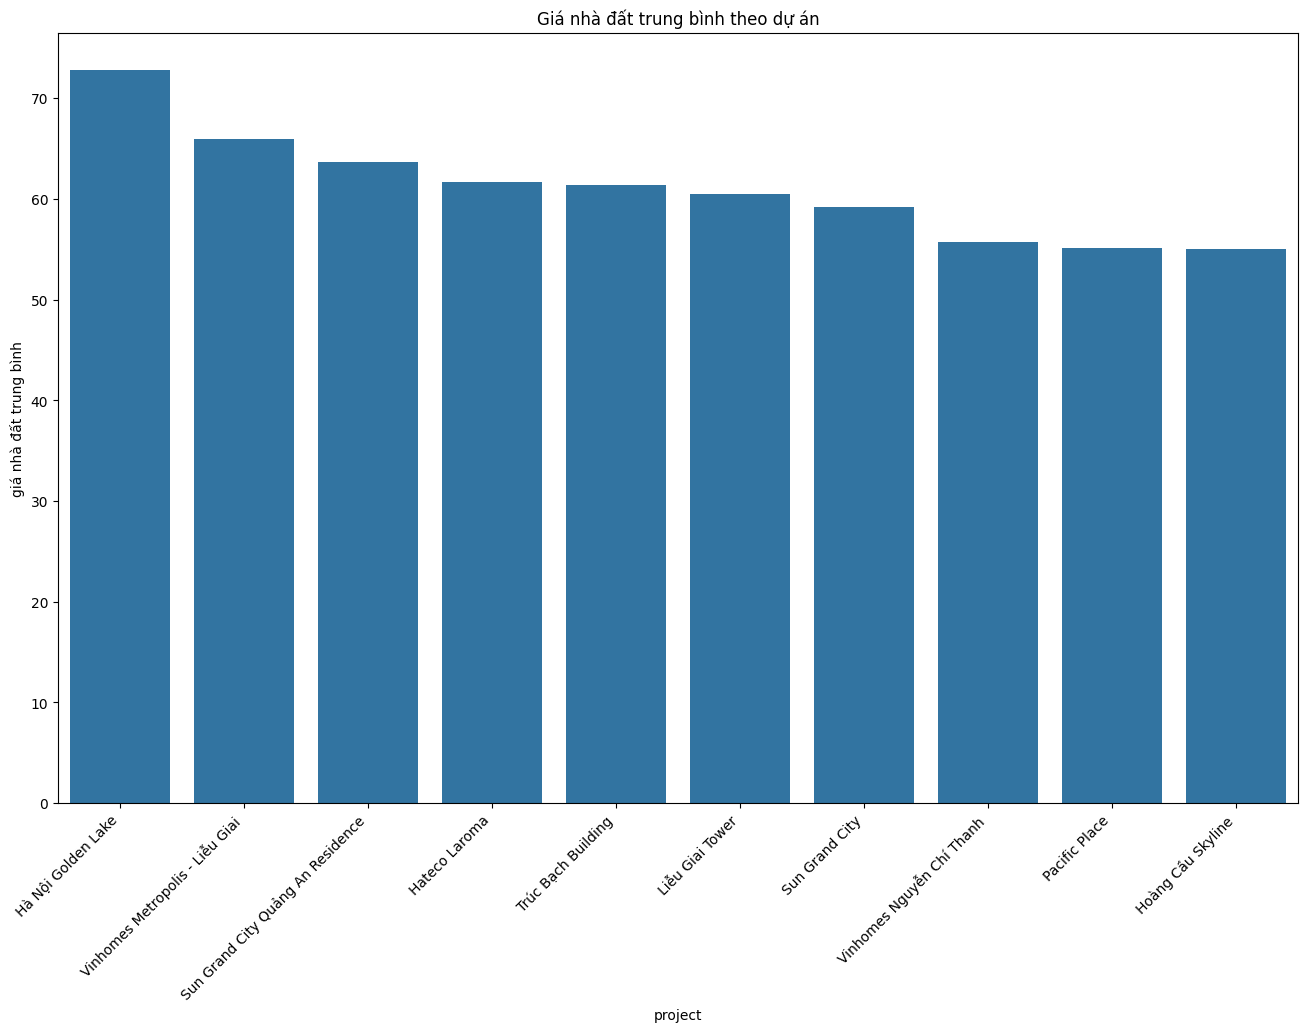

In [71]:
# Code ở đây
df1 = newdf.groupby('project')['real_estate_prices'].mean().reset_index(name='giá nhà đất trung bình').sort_values(by='giá nhà đất trung bình', ascending=False).head(10)
plt.figure(figsize=(16,10))
sns.barplot(data=df1, x='project', y='giá nhà đất trung bình')
plt.title('Giá nhà đất trung bình theo dự án')
plt.ylabel('giá nhà đất trung bình')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

* Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2

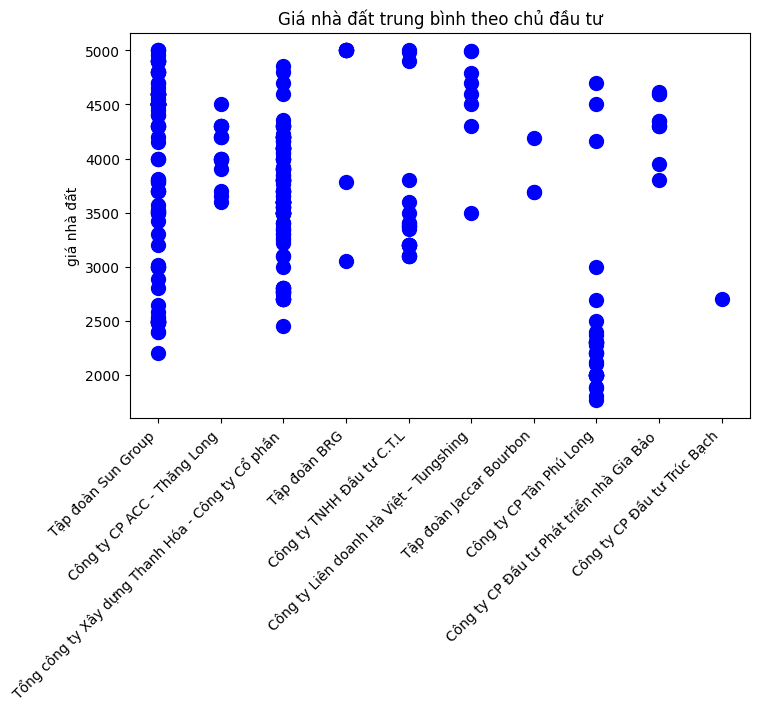

In [76]:
# Code ở đây
df1 = newdf.groupby('investor')['real_estate_prices'].mean().reset_index(name='giá nhà đất trung bình').sort_values(by='giá nhà đất trung bình', ascending=False).head(10)
investors_list = df1['investor']
df1 = newdf[newdf['investor'].isin(investors_list)]
plt.figure(figsize=(8,5))
plt.scatter(x = df1['investor'], y = df1['price'], color='blue', s=100)
plt.title('Giá nhà đất trung bình theo chủ đầu tư')
plt.xlabel
plt.ylabel('giá nhà đất')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

* Giá bất động sản phân bố theo dự án

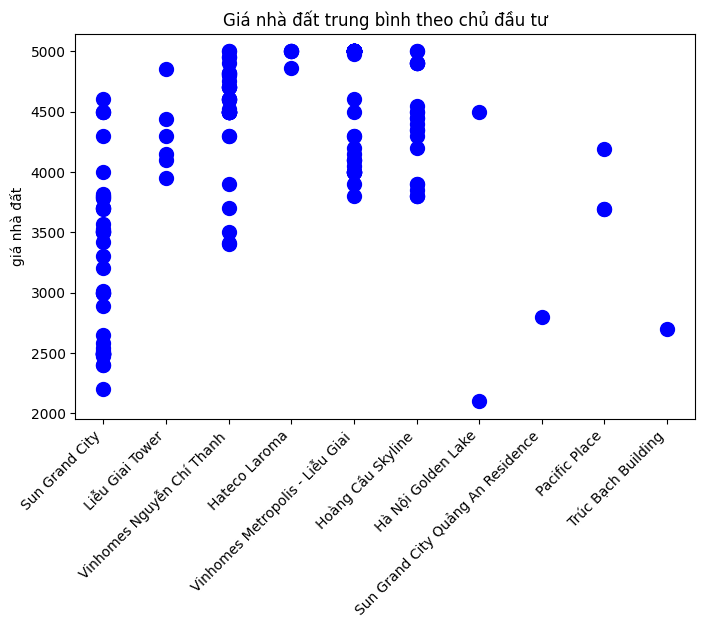

In [77]:
# Code ở đây
# Code ở đây
df1 = newdf.groupby('project')['real_estate_prices'].mean().reset_index(name='giá nhà đất trung bình').sort_values(by='giá nhà đất trung bình', ascending=False).head(10)
project_list = df1['project']
df1 = newdf[newdf['project'].isin(project_list)]
plt.figure(figsize=(8,5))
plt.scatter(x = df1['project'], y = df1['price'], color='blue', s=100)
plt.title('Giá nhà đất trung bình theo chủ đầu tư')
plt.xlabel
plt.ylabel('giá nhà đất')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

* Giá nhà đất trung bình theo hướng nhà (VND/m2)

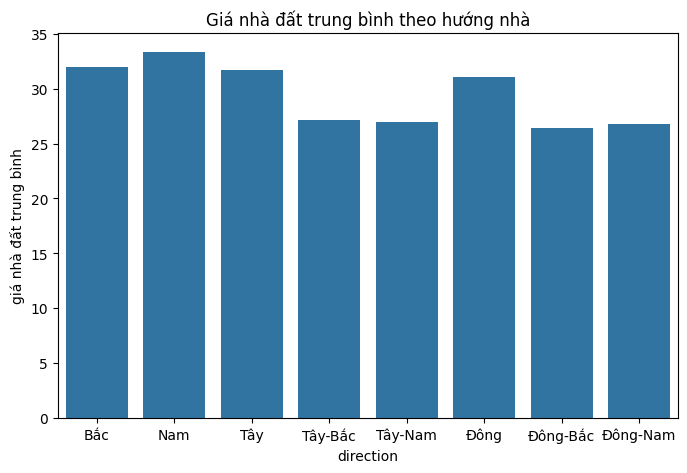

In [81]:
# Code ở đây
df1 = newdf.groupby('direction')['real_estate_prices'].mean().reset_index(name='giá nhà đất trung bình')
plt.figure(figsize=(8,5))
sns.barplot(data=df1, x='direction', y='giá nhà đất trung bình')
plt.title('Giá nhà đất trung bình theo hướng nhà')
plt.show()

3. Tương quan giữa các trường thuộc tính

* https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
* bieu do the hien he so tuong quan giua cac cap bien so thuc banggf biểu đồ heatmap

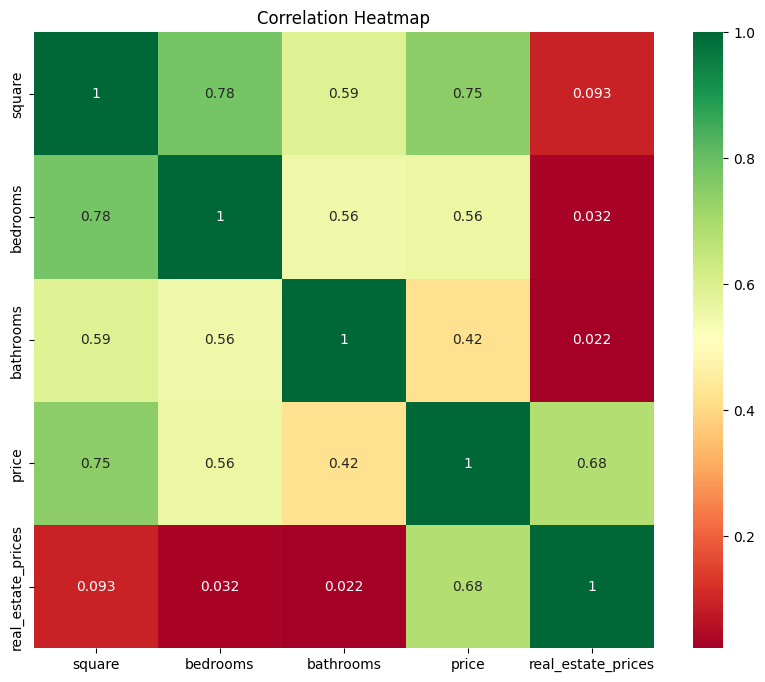

In [85]:
# Gợi ý: sns.heatmap(cmap='RdYlGn', ...)
corr = newdf.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdYlGn', annot=True)
plt.title('Correlation Heatmap')
plt.show()

* bieu do the hien moi quan he giua cac bien so thuc với biểu đồ phân tán

<Figure size 1000x800 with 0 Axes>

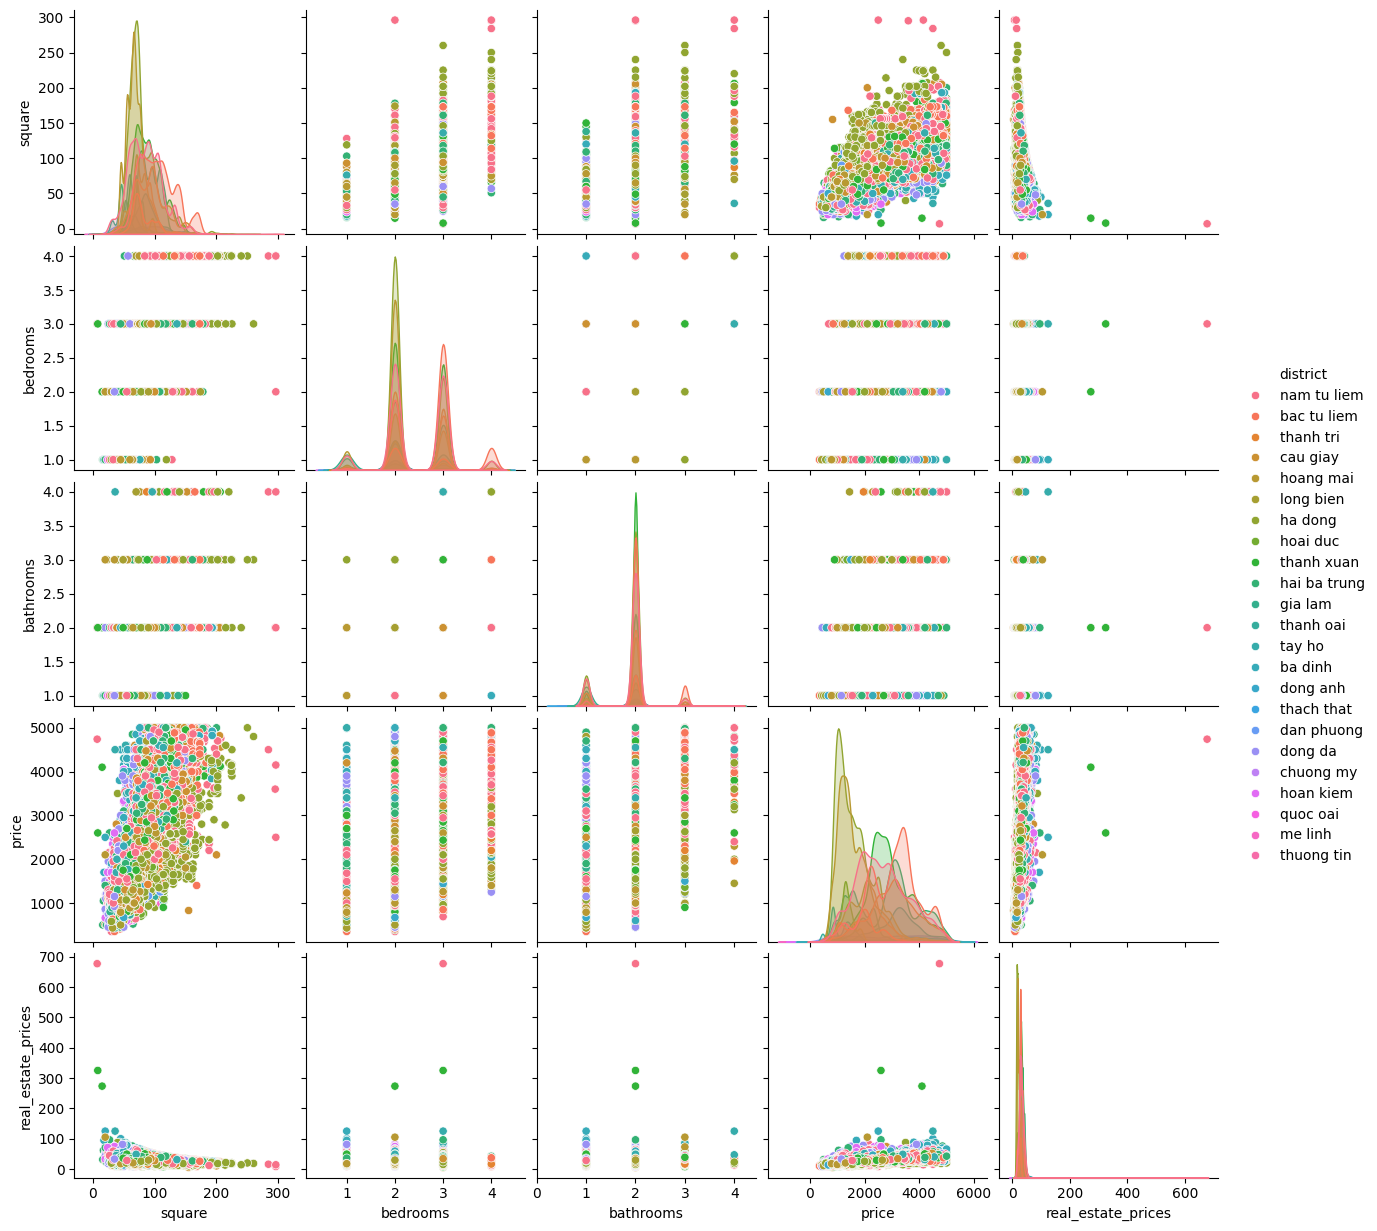

In [87]:
#Gợi ý: sns.pairplot(kind='scatter', ...)
plt.figure(figsize=(10,8))
sns.pairplot(newdf, kind='scatter', diag_kind='kde', hue='district')
plt.show()


4. Mật độ giá nhà trung bình theo quận 

<Figure size 1000x600 with 0 Axes>

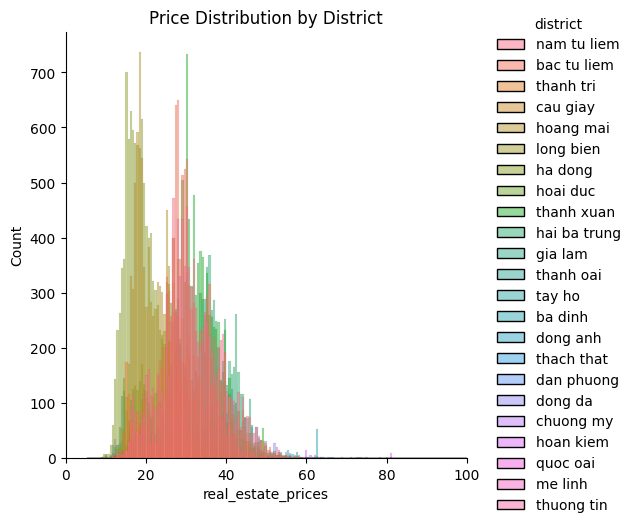

In [92]:
#Gợi ý: sns.displot()
plt.figure(figsize=(10,6))
sns.displot(newdf, x="real_estate_prices", hue="district")
plt.xlim(0, 100)
plt.title('Price Distribution by District')
plt.show()



End :))